# Лабораторная работа 4. Методы поиска.
## Выполнил студент группы БСТ2105 Гусельников Г. М.

Реализовать методы поиска в соответствии с заданием. Организовать генерацию начального набора случайных данных. Для всех вариантов добавить реализацию добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.

### Задание 1
### Бинарный поиск

In [1]:
import random
import math
import time
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def BinarySearch(ls: list, value: int) -> int:
    middle = len(ls) // 2
    left = 0
    right = len(ls) - 1
    while left < right and middle != value:
        if value > ls[middle]:
            left = middle + 1
        else:
            right = middle
        middle = (left + right) // 2
    return None if left > right else middle

In [11]:
n = int(input("Enter length of list: N = "))
ls = [random.randint(1, 100) for _ in range(n)]
ls.sort()
print(ls)
value = int(input("Enter a value to search: "))
print("ID of elem = ", BinarySearch(ls, value))

Enter length of list: N = 20
[1, 8, 16, 23, 28, 28, 31, 40, 41, 54, 57, 70, 72, 73, 76, 84, 85, 90, 91, 97]
Enter a value to search: 84
ID of elem =  15


### Бинарное дерево

In [25]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)  # Создание нового узла
        if self.root is None:  # Если дерево пустое
            self.root = new_node  # Новый узел становится корневым
            return
        current = self.root  # Текущий узел - корневой
        while True:
            if value < current.value:  # Если значение меньше значения текущего узла
                if current.left is None:  # Если левый потомок отсутствует
                    current.left = new_node  # Новый узел становится левым потомком текущего узла
                    break
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше или равно значению текущего узла
                if current.right is None:  # Если правый потомок отсутствует
                    current.right = new_node  # Новый узел становится правым потомком текущего узла
                    break
                current = current.right  # Текущим узлом становится правый потомок текущего узла

    def search(self, value):
        current = self.root  # Текущий узел - корневой
        while True:
            if current is None:  # Если текущий узел отсутствует
                return False  # Узел не найден
            if current.value == value:  # Если значения текущего узла искомого узла равны
                return True  # Узел найден
            elif value < current.value:  # Если значение меньше значения текущего узла
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше значения текущего узла
                current = current.right  # Текущим узлом становится правый потомок текущего узла
                
    def printTree(self, node): # распечатываем все дерево, от большего к меньшему
        if node is None:
            return
        self.printTree(node.left)
        print(node.value, end=" ")
        self.printTree(node.right)
    
    
    
    def delete(self, value):
        
        def _delete(node, value):
            if node is None:  # если узел пустой, значит элемента в дереве нет
                return node
            elif value < node.value:  # если значение меньше значения узла, рекурсивно идем влево
                node.left = _delete(node.left, value)
            elif value > node.value:  # если значение больше значения узла, рекурсивно идем вправо
                node.right = _delete(node.right, value)
            else:  # если значение равно значению узла, то это узел, который нужно удалить
                if node.left is None:  # если у узла нет левого потомка, возвращаем правого потомка
                    temp = node.right
                    node = None
                    return temp
                elif node.right is None:  # если у узла нет правого потомка, возвращаем левого потомка
                    temp = node.left
                    node = None
                    return temp
                temp = self.minValueNode(node.right)  # ищем узел с минимальным значением в правом поддереве
                node.value = temp.value  # копируем значение найденного узла в удаляемый узел
                node.right = _delete(node.right, temp.value)  # рекурсивно удаляем найденный узел
            return node
        
        self.root = _delete(self.root, value)
        
        
    def minValueNode(self, node):  # метод для поиска узла с минимальным значением в дереве
        current = node
        while current.left is not None:
            current = current.left
        return current

In [22]:
tree = BinaryTree()
for i in range(10):
    tree.insert(random.randint(1, 10))
print(tree.search(10))

True


In [23]:
tree.printTree(tree.root)

1 1 4 6 7 8 8 9 10 10 

In [24]:
tree.delete(9)
tree.printTree(tree.root)

1 1 4 6 7 8 8 10 10 

### Поиск Фибоначчи

In [31]:
def fibonacci_search(arr, item):
    fib1, fib2 = 0, 1
    fib_sum = fib1 + fib2
    while fib_sum < len(arr):
        fib1 = fib2
        fib2 = fib_sum
        fib_sum = fib1 + fib2

    offset = -1
    while fib_sum > 1:
        i = min(offset + fib1, len(arr) - 1)
        if arr[i] < item:
            fib_sum = fib2
            fib2 = fib1
            fib1 = fib_sum - fib2
            offset = i
        elif arr[i] > item:
            fib_sum = fib1
            fib2 = fib2 - fib1
            fib1 = fib_sum - fib2
        else:
            return i
    if fib2 == 1 and arr[offset + 1] == item:
        return offset + 1
    return None

In [32]:
n = int(input("Enter N: "))
arr = sorted([random.randint(1, 100) for _ in range(n)])
print(arr)
item = int(input("Enter item: "))
result = fibonacci_search(arr, item)
if result is not None:
    print(f"Element {item} found at index {result}")
else:
    print(f"Element {item} not found")

Enter N: 20
[1, 2, 7, 8, 11, 20, 25, 31, 31, 32, 59, 59, 60, 62, 71, 77, 80, 86, 93, 100]
Enter item: 20
Element 20 found at index 5


### Интерполяционный поиск

In [33]:
def interpolation_search(arr, item):
    low = 0
    high = len(arr) - 1
    while low <= high and item >= arr[low] and item <= arr[high]:
        pos = low + ((item - arr[low]) * (high - low) // (arr[high] - arr[low]))
        if arr[pos] == item:
            return pos
        elif arr[pos] < item:
            low = pos + 1
        else:
            high = pos - 1
    return None

In [34]:
n = int(input("Enter N: "))
arr = sorted([random.randint(1, 100) for _ in range(n)])
print(arr)
item = int(input("Enter item: "))
result = interpolation_search(arr, item)
if result is not None:
    print(f"Element {item} found at index {result}")
else:
    print(f"Element {item} not found")

Enter N: 30
[5, 9, 13, 15, 16, 17, 19, 22, 30, 30, 35, 38, 46, 50, 52, 57, 57, 69, 74, 82, 84, 87, 87, 89, 89, 91, 92, 95, 96, 99]
Enter item: 57
Element 57 found at index 16


### Сравнение методов поиска

In [47]:
arrays, elems = [], []
for i in range(1, 11):
    arrays.append([random.randint(1, 10000*i) for _ in range(10000*i)])
    elems.append(10000*i)

In [48]:
binary = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = BinarySearch(array, 9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binary.append(end-start)

10000 элементов:  0.002503 cекунд
20000 элементов:  0.003313 cекунд
30000 элементов:  0.005762 cекунд
40000 элементов:  0.007392 cекунд
50000 элементов:  0.009822 cекунд
60000 элементов:  0.01429 cекунд
70000 элементов:  0.014252 cекунд
80000 элементов:  0.016326 cекунд
90000 элементов:  0.019068 cекунд
100000 элементов:  0.021511 cекунд


In [49]:
binarytree = []
for i in range(len(arrays)):
    tree = BinaryTree()
    for elem in arrays[i]:
        tree.insert(elem)
    start = time.perf_counter()
    res = tree.search(9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binarytree.append(end-start)

10000 элементов:  6e-06 cекунд
20000 элементов:  1e-05 cекунд
30000 элементов:  7e-06 cекунд
40000 элементов:  9e-06 cекунд
50000 элементов:  1e-05 cекунд
60000 элементов:  8e-06 cекунд
70000 элементов:  9e-06 cекунд
80000 элементов:  9e-06 cекунд
90000 элементов:  8e-06 cекунд
100000 элементов:  1.2e-05 cекунд


In [50]:
fibonacci = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = fibonacci_search(array, 9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    fibonacci.append(end-start)

10000 элементов:  0.002545 cекунд
20000 элементов:  0.003181 cекунд
30000 элементов:  0.005772 cекунд
40000 элементов:  0.007206 cекунд
50000 элементов:  0.009516 cекунд
60000 элементов:  0.011936 cекунд
70000 элементов:  0.013265 cекунд
80000 элементов:  0.015236 cекунд
90000 элементов:  0.017779 cекунд
100000 элементов:  0.020072 cекунд


In [51]:
interpol = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = interpolation_search(array, 9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    interpol.append(end-start)

10000 элементов:  0.002557 cекунд
20000 элементов:  0.003355 cекунд
30000 элементов:  0.005786 cекунд
40000 элементов:  0.007294 cекунд
50000 элементов:  0.010016 cекунд
60000 элементов:  0.011998 cекунд
70000 элементов:  0.013964 cекунд
80000 элементов:  0.01736 cекунд
90000 элементов:  0.018805 cекунд
100000 элементов:  0.021463 cекунд


In [52]:
python = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    try:
        array.index(9999*i+1)
    except ValueError:
        pass
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    python.append(end-start)

10000 элементов:  0.002772 cекунд
20000 элементов:  0.003554 cекунд
30000 элементов:  0.005954 cекунд
40000 элементов:  0.008093 cекунд
50000 элементов:  0.010583 cекунд
60000 элементов:  0.014017 cекунд
70000 элементов:  0.015171 cекунд
80000 элементов:  0.017298 cекунд
90000 элементов:  0.019294 cекунд
100000 элементов:  0.022644 cекунд


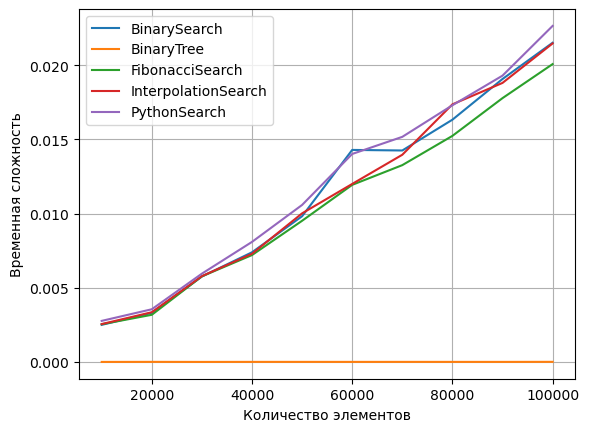

In [53]:
#общий график - сравнение алгоритмов
plt.xlabel('Количество элементов')
plt.ylabel('Временная сложность')
plt.plot(elems, binary, label ='BinarySearch')
plt.plot(elems, binarytree, label ='BinaryTree')
plt.plot(elems, fibonacci, label ='FibonacciSearch')
plt.plot(elems, interpol, label ='InterpolationSearch')
plt.plot(elems, python, label ='PythonSearch')
plt.grid()
plt.legend()
plt.show()

In [55]:
df = pd.DataFrame({'BinarySearch O(log n)': [binary[i] for i in range(10)],
                   'BinaryTree O(log(log n))': [binarytree[i] for i in range(10)],
                   'FibonacciSearch O(log n)': [fibonacci[i] for i in range(10)],
                   'InterpolationSearch O(log n)': [interpol[i] for i in range(10)],
                   'PythonSearch O(log n)': [python[i] for i in range(10)]}, index=elems).round(6)

df

,BinarySearch O(log n),BinaryTree O(log(log n)),FibonacciSearch O(log n),InterpolationSearch O(log n),PythonSearch O(log n)
10000,0.002503,0.000006,0.002545,0.002557,0.002772
20000,0.003313,0.000010,0.003181,0.003355,0.003554
30000,0.005762,0.000007,0.005772,0.005786,0.005954
40000,0.007392,0.000009,0.007206,0.007294,0.008093
50000,0.009822,0.000010,0.009516,0.010016,0.010583
60000,0.014290,0.000008,0.011936,0.011998,0.014017
70000,0.014252,0.000009,0.013265,0.013964,0.015171
80000,0.016326,0.000009,0.015236,0.017360,0.017298
90000,0.019068,0.000008,0.017779,0.018805,0.019294
100000,0.021511,0.000012,0.020072,0.021463,0.022644


### Задание 2
### Простое рехэширование

In [107]:
# при возникновении коллизии, ключ переносится в следующую свободную ячейку, начиная с той, в которой он должен быть помещен
class HashNode:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        
    def get_key(self):
        return self.key

    def get_value(self):
        return self.value

class SimpleHashMap:
    
    def __init__(self, capacity: int):
        self.size = 0
        self.capacity = capacity
        self.buckets = [None] * self.capacity
    
    def _hash_generate(self, key):
        return key % self.capacity

    def insert(self, key, value):
        if self.size != self.capacity:
            self.size += 1
            index = self._hash_generate(key)
            while self.buckets:
                if self.buckets[index] != None: # проверка на коллизию
                    index = (index + 1) % self.capacity
                else: break
            self.buckets[index] = HashNode(index, value) #?
        else:
            print("HashMap is full")
    
    def get(self, key):
        index = _hash_generate(key)
        return self.buckets[index]
    
    def delete(self, key):
        index = _hash_generate(key)
        if self.size:
            self.size -= 1
            self.buckets[index] = None
        else:
            print("HashMap is empty")
        
        
    def print(self):
        for i in range(len(self.buckets)):
            if self.buckets[i] != None:
                print(self.buckets[i].get_key(), self.buckets[i].get_value(), sep=": ")
        print()

In [108]:
hash_table = SimpleHashMap(6)
hash_table.insert(1, 2)
hash_table.insert(2, 0)
hash_table.insert(4, 4)
hash_table.insert(11, 3) 
hash_table.insert(16, 7) # коллизия с ключом (11 % 6 == 16 % 6)
hash_table.insert(10, 10)
hash_table.print()

hash_table.insert(12, 10)

0: 7
1: 2
2: 0
3: 10
4: 4
5: 3

HashMap is full


### Рехэширование с псевдослучайными числами

In [141]:
class RandomHashMap:
    
    def __init__(self, capacity: int):
        self.size = 0
        self.capacity = capacity
        self.buckets = [None] * self.capacity
    
    def _random_hash_generate(self, key):
        indexes = [i for i in range(self.capacity)]
        random.shuffle(indexes)
        while self.buckets:
            index = indexes.pop()
            if self.buckets[index] == None: # проверка на коллизию
                return index

    def insert(self, key, value):
        if self.size != self.capacity:
            self.size += 1
            index = self._random_hash_generate(key)
            self.buckets[index] = HashNode(index, value) #?
        else:
            print("HashMap is full")
            
    def delete(self, key):
        if key > self.capacity-1:
            print("key isn't found")
        if self.size:
            self.size -= 1
            self.buckets[key] = None
        else:
            print("HashMap is empty")
            
    def print(self):
        for i in range(len(self.buckets)):
            if self.buckets[i] != None:
                print(f"Key: {self.buckets[i].get_key()}, Value: {self.buckets[i].get_value()}")
        print()

In [142]:
hash_map = RandomHashMap(6)
hash_map.insert(1, 2)
hash_map.insert(2, 0)
hash_map.insert(4, 4)
hash_map.insert(11, 3) 
hash_map.insert(16, 7)
hash_map.insert(10, 10)
hash_map.print()

hash_map.insert(12, 10)

Key: 0, Value: 3
Key: 1, Value: 0
Key: 2, Value: 2
Key: 3, Value: 7
Key: 4, Value: 4
Key: 5, Value: 10

HashMap is full


### Метод цепочек

In [143]:
# Метод цепочек - это метод решения коллизий в хэш-таблицах.
# Он основан на создании связанных списков (цепочек) элементов,
# которые имеют одинаковый хэш-код.
# Создаем класс узла списка
class ChainHashNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
    
    def get_key(self):
        return self.key

    def get_value(self):
        return self.value
    
    def get_next(self):
        return self.next


# Создаем класс хэш-таблицы
class ChainHashMap:
    def __init__(self):
        self.capacity = 10  # начальная емкость таблицы
        self.size = 0  # количество элементов в таблице
        self.buckets = [None] * self.capacity  # создаем пустые списки для каждой ячейки таблицы

    # Метод добавления элемента в таблицу
    def insert(self, key, value):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ уже есть в таблице, обновляем значение
                node.value = value
                return
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = ChainHashNode(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None

    # Метод удаления элемента из таблицы
    def delete(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        prev = None
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, удаляем элемент
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2  # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity  # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = ChainHashNode(node.key, node.value)
                else:
                    new_buckets[index] = ChainHashNode(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets
        
    def print(self):
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                print(f"Key: {node.key}, Value: {node.value}")
                node = node.next


In [145]:
ht = ChainHashMap()
ht.insert('key1', 'value1')
ht.insert('key2', 'value2')
ht.insert('key3', 'value3')
ht.insert('key4', 'value4')
ht.insert('key5', 1)
ht.insert('key6', 2)
ht.insert('key5', 3)
ht.print()

Key: key4, Value: value4
Key: key3, Value: value3
Key: key5, Value: 3
Key: key1, Value: value1
Key: key6, Value: 2
Key: key2, Value: value2


### Задание 3
Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни один из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки, расположенные по вертикалям, горизонталям и обеим диагоналям

In [67]:
class Queen:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def attack(self, queen) -> bool:
        return self.x == queen.x or self.y == queen.y or abs(queen.x - self.x) == abs(queen.y - self.y)

    def getCoord(self):
        return (self.x, self.y)


def SolveQueens(boardSize: int, queens: list = None):
    if queens is None:
        queens = [Queen(0, random.randint(0, boardSize - 1))]

    if len(queens) == boardSize:
        res = []
        for queen in queens:
            res.append(queen.getCoord())
        return res
    else:
        row = len(queens)
        candidates = [Queen(row, i) for i in range(boardSize)]
        for candidate in candidates:
            under_attack = False
            for queen in queens:
                if queen.attack(candidate):
                    under_attack = True
                    break
            if not under_attack:
                queens.append(candidate)
                result = SolveQueens(boardSize, queens)
                if result is not None:
                    return result
                queens.pop()
        return None


def Draw(placement):
    boardSize = len(placement)
    for x in range(boardSize):
        for y in range(boardSize):
            if (x, y) in placement:
                print("♛", end="")
            else:
                print("▢", end="")
        print()


Draw(SolveQueens(8))

▢▢▢▢♛▢▢▢
♛▢▢▢▢▢▢▢
▢▢▢♛▢▢▢▢
▢▢▢▢▢♛▢▢
▢▢▢▢▢▢▢♛
▢♛▢▢▢▢▢▢
▢▢▢▢▢▢♛▢
▢▢♛▢▢▢▢▢


## Вывод
В ходе данной лабораторной работы были реализованы методы поиска элемента в массиве и определены зависимости времени исполнения алгоритма от числа элементов массива, построен график и сводная таблица. Были реализованы три вида хэширования. Была решена задача с расстановкой ферзей на шахматной доске.